<img src='pic.jpg'>

## Table of Contents

* [Introduction](#Introduction)
* [Inspiration](#ins)
* [Datasets Used](#du)
* [Import Libraries](#il)
* [Reading Data](#rd)
* [1st Visualization : Top countries with Olympic medals](#1v)
* [1st Visualization-II: Gold, Silver and Bronze medals for top 10 countries](#2v)
   > [Insights](#i1)
* [2nd Visualization: Conversion rate to medals](#3v)
   >[Insights](#i2)
* [3rd Visualization-I: Gender Equality at Olympics](#4v)
   >[Insights](#i3)
* [3rd Visualization-II: Sex ratio of USA, Russia & Germany at Olympics](#5v)
   >[Insights](#i4)
* [Exploratory Data Analysis](#ed)
     1. [Female dominated Sports](#e1)
     2. [Age Analysis](#e2)
     3. [Sex ratio at Summer vs Winter Olympics](#e3)

## Introduction

The modern [Olympic Games](https://www.olympic.org) or Olympics are leading international sporting events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world's foremost sports competition with more than 200 nations participating. The Olympic Games are held every four years, with the Summer and Winter Games alternating by occurring every four years but two years apart.

<a id="ins"></a>

## Inspiration

Olympics being one of the prestigious competitions in the world, I was curious to know which country did the best, how well women did when compared to men and how it affected the total number of medals they won. So, to get a clearer picture, I picked the last ten Olympic games for my analysis.


<a id="du"></a>

## Dataset used

* [Historical Olympics data](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results):
This dataset contains Olympics data from Athens 1896 to Rio 2016 of both Winter and Summer Olympics. For the sake of analysis I am only considering Olympic games from the year 1976 i.e last ten Olympics games.
* [Country name data](https://github.com/nikhilarosekuruvilla/Olympic-Games-Analysis-1976-2016/blob/master/country_NOC.csv):
This dataset was used to get full country name from its NOC.

<a id="il"></a>

## Import libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import plotly.graph_objs as go
import plotly.plotly as py
import re
import warnings
warnings.filterwarnings("ignore")

<a id="rd"></a>

## Reading data

In [3]:
df_olympics=pd.read_csv("athlete_events.csv")
df_country_names=pd.read_csv("country_NOC.csv")
df_country_names.Code[df_country_names.Code=="GER"]="DEU"
df_olympics.Team=df_olympics.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics.Team[(df_olympics.Team=="Soviet Union")|(df_olympics.Team=="Unified Team")]="Russia"
df_olympics.NOC[(df_olympics.NOC=="URS")|(df_olympics.NOC=="EUN")]="RUS"
df_olympics.Team[(df_olympics.Team=="East Germany")]="Germany"
df_olympics.Team[(df_olympics.Team=="West Germany")]="Germany"
df_olympics.NOC[(df_olympics.NOC=="GDR")|(df_olympics.NOC=="FRG")|(df_olympics.NOC=="GER")]="DEU"
df_olympics_summer=df_olympics[(df_olympics.Year>=1973)&(df_olympics.Season=="Summer")]
df_olympics_winter=df_olympics[(df_olympics.Year>=1973)&(df_olympics.Season=="Winter")]
df_olympics_full=df_olympics[(df_olympics.Year>=1973)]

<a id="1v"></a>

## 1st Visualization-I: Top countries with Olympic medals

In [4]:
# Summer
df_olympics_medal_summer=df_olympics_summer[(df_olympics_summer.Medal.notnull())]
df_olympics_medal_summer.Team=df_olympics_medal_summer.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics_medal_countries_per_year_summer=df_olympics_medal_summer.groupby(["NOC", "Year"]).agg(\
    {"Event":"nunique"}).reset_index()
df_olympics_medal_countries_summer=df_olympics_medal_countries_per_year_summer.groupby(["NOC"]).agg(\
    {"Event":"sum"}).reset_index()
df_olympics_medal_countries_summer=pd.merge(df_olympics_medal_countries_summer, df_country_names,\
                                            how="left", left_on="NOC", right_on="Code")
df_olympics_medal_countries_summer_top=df_olympics_medal_countries_summer.sort_values(\
    "Event", ascending=False).head(10)
# Winter
df_olympics_medal_winter=df_olympics_winter[(df_olympics_winter.Medal.notnull())]
df_olympics_medal_winter.Team=df_olympics_medal_winter.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics_medal_countries_per_year_winter=df_olympics_medal_winter.groupby(["NOC", "Year"]).agg(\
    {"Event":"nunique"}).reset_index()
df_olympics_medal_countries_winter=df_olympics_medal_countries_per_year_winter.groupby(["NOC"]).agg(\
    {"Event":"sum"}).reset_index()
df_olympics_medal_countries_winter=pd.merge(df_olympics_medal_countries_winter, df_country_names,\
                                            how="left", left_on="NOC", right_on="Code")
df_olympics_medal_countries_winter_top=df_olympics_medal_countries_winter.sort_values(\
    "Event", ascending=False).head(10)

In [70]:
data = [ dict( name='Summer', visible=True,
        type = 'choropleth',
        locations = df_olympics_medal_countries_summer.NOC,
        text=df_olympics_medal_countries_summer.Country,
        z = df_olympics_medal_countries_summer.Event,
        colorscale = [[0,"rgb(255,69,0)"],[0.35,"rgb(255,99,71)"],[0.5,"rgb(255,127,80)"],\
            [0.6,"rgb(255,140,0)"],[0.7,"rgb(255,165,0)"],[1,"rgb(255,215,0)"]],
        autocolorscale = False,
        reversescale = True,
        colorbar = dict(
            autotick = False,
            title = 'Medal count')),
    dict( name='Winter', visible=False,
        type = 'choropleth',
        locations = df_olympics_medal_countries_winter.NOC,
        text=df_olympics_medal_countries_winter.Country,
        z = df_olympics_medal_countries_winter.Event, 
        colorscale = [[0,"rgb(0,128,128)"],[0.35,"rgb(32,178,170)"],[0.5,"rgb(64,224,208)"],\
            [0.6,"rgb(0,255,255)"],[0.7,"rgb(175,238,238)"],[1,"rgb(224,255,255)"]],
        autocolorscale = False,
        reversescale = True,
        colorbar = dict(
            autotick = False,
            title = 'Medal count'))  
]
updatemenus=list([
    dict(
        buttons=list([   
            dict(
                label='Summer',
                method='update',
                args = [{'visible': [True, False]},
                         {'title': 'Medals won per Country in Summer Olympics'}]
            ),
            dict(
                label='Winter',
                method='update',
                args = [{'visible': [False, True, False]},
                         {'title': 'Medals won per Country in Winter Olympics'}]
            )
        ]),
        direction = 'down',
        pad = {'r': 10, 't': 10},
        showactive = True,
        x = 0,
        xanchor = 'left',
        y = 1.1,
        yanchor = 'top' 
    )
])
layout=go.Layout(title="Medals won per Country in Summer Olympics",
                font=dict(size=16))
layout['updatemenus']=updatemenus
fig = dict( data=data, layout=layout)
py.iplot(fig, validate=False)

<a id="2v"></a>

## 1st Visualization-II: Gold, Silver and Bronze medals for top 10 countries

In [5]:
# Summer
df_olympics_medal_GSB_summer=df_olympics_summer[(df_olympics_summer.Medal.notnull())]
df_olympics_medal_GSB_summer.Team=df_olympics_medal_GSB_summer.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics_medal_GSB_summer=df_olympics_medal_GSB_summer.groupby(["Year", "NOC", "Medal"]).agg(\
    {"Event":"nunique"}).reset_index()
df_olympics_medal_GSB_summer=df_olympics_medal_GSB_summer.groupby(["NOC", "Medal"]).agg(\
    {"Event":"sum"}).reset_index()
df_olympics_medal_GSB_summer=pd.pivot_table(df_olympics_medal_GSB_summer, values='Event', index=["NOC"],\
                                       columns=['Medal']).reset_index()
df_olympics_medal_GSB_summer["Total"]=df_olympics_medal_GSB_summer.apply(lambda x: x.Gold+x.Silver+x.Bronze, axis=1)
df_olympics_medal_GSB_summer.sort_values("Total", ascending=False, inplace=True)
top_countries=df_olympics_medal_countries_summer.sort_values("Event", ascending=False).head(10).NOC.values
top_countries=top_countries.tolist()
df_olympics_medal_GSB_summer=df_olympics_medal_GSB_summer.loc[df_olympics_medal_GSB_summer.NOC.isin(top_countries)]
# Winter
df_olympics_medal_GSB_winter=df_olympics_winter[(df_olympics_winter.Medal.notnull())]
df_olympics_medal_GSB_winter.Team=df_olympics_medal_GSB_winter.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics_medal_GSB_winter=df_olympics_medal_GSB_winter.groupby(["Year", "NOC", "Medal"]).agg(\
    {"Event":"nunique"}).reset_index()
df_olympics_medal_GSB_winter=df_olympics_medal_GSB_winter.groupby(["NOC", "Medal"]).agg(\
    {"Event":"sum"}).reset_index()
df_olympics_medal_GSB_winter=pd.pivot_table(df_olympics_medal_GSB_winter, values='Event', index=["NOC"],\
                                       columns=['Medal']).reset_index()
df_olympics_medal_GSB_winter["Total"]=df_olympics_medal_GSB_winter.apply(lambda x: x.Gold+x.Silver+x.Bronze, axis=1)
df_olympics_medal_GSB_winter.sort_values("Total", ascending=False, inplace=True)
top_countries=df_olympics_medal_countries_winter.sort_values("Event", ascending=False).head(10).NOC.values
top_countries=top_countries.tolist()
df_olympics_medal_GSB_winter=df_olympics_medal_GSB_winter.loc[df_olympics_medal_GSB_winter.NOC.isin(top_countries)]
df_olympics_medal_GSB_summer_country_name=pd.merge(df_olympics_medal_GSB_summer, df_country_names, how="left",\
                         left_on='NOC', right_on='Code')
df_olympics_medal_GSB_winter_country_name=pd.merge(df_olympics_medal_GSB_winter, df_country_names, how="left",\
                         left_on='NOC', right_on='Code')

In [8]:
trace_summer_G=go.Bar(x=df_olympics_medal_GSB_summer_country_name.Country,
                        y=df_olympics_medal_GSB_summer.Gold,
                        name='Gold',  visible=True,
                        marker=dict(color='gold'))
trace_summer_S=go.Bar(x=df_olympics_medal_GSB_summer_country_name.Country,
                        y=df_olympics_medal_GSB_summer.Silver,
                        name='Silver',  visible=True,
                        marker=dict(color='silver'))
trace_summer_B=go.Bar(x=df_olympics_medal_GSB_summer_country_name.Country,
                        y=df_olympics_medal_GSB_summer.Bronze,
                        name='Bronze',  visible=True,
                        marker=dict(color='#CD853F'))
trace_winter_G=go.Bar(x=df_olympics_medal_GSB_winter_country_name.Country,
                        y=df_olympics_medal_GSB_winter.Gold,
                        name='Gold',  visible=False,
                        marker=dict(color='gold'))
trace_winter_S=go.Bar(x=df_olympics_medal_GSB_winter_country_name.Country,
                        y=df_olympics_medal_GSB_winter.Silver,
                        name='Silver',  visible=False,
                        marker=dict(color='silver'))
trace_winter_B=go.Bar(x=df_olympics_medal_GSB_winter_country_name.Country,
                        y=df_olympics_medal_GSB_winter.Bronze,
                        name='Bronze',  visible=False,
                        marker=dict(color='#CD853F'))
data = [trace_summer_G, trace_summer_S, trace_summer_B, trace_winter_G, trace_winter_S, trace_winter_B]
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([
            dict(label = 'Summer',
                 method = 'update',
                     args = [{'visible': [True, True, True, False, False, False]},
                         {'title': 'Top Countries in Summer Olympics'
                              }]),
            dict(label = 'Winter',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, True, True]},
                         {'title': 'Top Countries in Winter Olympics'
                          }])
            ]),
             direction='left',
             x=0.01,
             xanchor='left',
             y=1.1,
             yanchor='top' 
    )
])
layout = dict(barmode='stack', 
              title='Top Countries in Summer Olympics', 
              width=1050,
              height=600,
              showlegend=True,
              legend=dict(x=.85, y=1, 
                             bgcolor='#5E565F',
                             bordercolor="white",
                             borderwidth=1,
                             font=dict(color="white")),
              updatemenus=updatemenus,
              plot_bgcolor='#5E565F',
                 font=dict(size=16),
                 xaxis={'title':'Country name',
                    'tickfont':dict(size=14)}, 
                 yaxis={'title':'Count of medals',
                       'tickfont':dict(size=14),
                       'tickangle':0})
fig = dict(data=data, layout=layout)
py.iplot(fig)

<a id="i1"></a>

###  Insights

1. The countries winnning highest number of medals in Summer games are different from those winning in Winter games except USA, Russia and Germany. 
2. We can notice that the top countries at the Olympic games are some of the most developed countries in the world.   
    * Hence, they can provide their atheletes with top-notch facilities, coaches and training centers to excel at their game.
3. At the Winter games we can see that there are very less countries participating compared to Summer games.     
    * This is probably because, for them it's less expensive and they have better infrastructure compared to tropical countries to  train their atheletes for Winter Olympics events.    
    * Most of the countries winning in Winter games are those countries away from the equator or those with colder climates than rest of the world.    

<a id="3v"></a>

## 2nd Visualization: Conversion rate to medals

In [20]:
# Count of Partiipants
df_olympics_summer_pariticpants=df_olympics_full
df_olympics_summer_pariticpants.Team=df_olympics_summer_pariticpants.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics_summer_pariticpants_countries_year=df_olympics_summer_pariticpants.groupby(["NOC", "Year"]).agg(\
    {"Event":"nunique"}).reset_index()
df_olympics_summer_pariticpants_countries=df_olympics_summer_pariticpants_countries_year.groupby(["NOC"]).agg(\
    {"Event":"sum"}).reset_index()
df_olympics_summer_pariticpants_countries=df_olympics_summer_pariticpants_countries.sort_values(\
    "Event", ascending=False)
df_olympics_summer_pariticpants_countries.rename(columns={'Event': 'Participants_count'}, \
                                                 inplace=True)
# Count of Medal Winners
df_olympics_medal_full=df_olympics_full[(df_olympics_full.Medal.notnull())]
df_olympics_medal_full.Team=df_olympics_medal_full.Team.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))
df_olympics_medal_full_per_year_summer=df_olympics_medal_full.groupby(["NOC", "Year"]).agg(\
    {"Event":"nunique"}).reset_index()
df_olympics_medal_countries_full=df_olympics_medal_full_per_year_summer.groupby(["NOC"]).agg(\
    {"Event":"sum"}).reset_index()
df_olympics_medal_countries_full=df_olympics_medal_countries_full.sort_values(\
    "Event", ascending=False)
df_olympics_medal_countries_full.rename(columns={'Event': 'Medals_count'}, \
                                                 inplace=True)
df_conversion=pd.merge(df_olympics_medal_countries_full, df_olympics_summer_pariticpants_countries, how="left",\
                         on=['NOC'])
df_conversion['ratio']=df_conversion.apply(lambda x: (x.Medals_count/x.Participants_count)*100,axis=1)
df_conversion=df_conversion.sort_values("ratio", ascending=False)
df_conversion=df_conversion.head(10)
df_conversion_country_name=pd.merge(df_conversion, df_country_names, how="left", left_on="NOC", right_on="Code")

In [31]:
trace1 = go.Bar(
    x=df_conversion_country_name.Country,
    y=df_conversion_country_name.Participants_count,
    name='Count of Participants',
    marker=dict(color='#660033')
)
trace2 = go.Bar(
    x=df_conversion_country_name.Country,
    y=df_conversion_country_name.Medals_count,
    name='Count of Medals',
    marker=dict(color='#009933')
)
trace3=go.Scatter(
    x=df_conversion_country_name.Country,
    y=df_conversion_country_name.ratio,
    yaxis='y2',
    name='Medal to Participant ratio',
    marker=dict(color='#ff9900')
)
layout=go.Layout(barmode='group',
                 title="Medal to Participant ratio of Countries",
                 font=dict(size=16),
                 xaxis={'title':'Country name',
                    'tickfont':dict(size=14),
                       'ticktext':[]}, 
                 yaxis={'title':'Count',
                       'tickfont':dict(size=14)},
                  yaxis2=dict(
                    title='Medal to Participant ratio',
                        titlefont=dict(
                            color='#ff9900'
                        ),
                        tickfont=dict(
                            color='#ff9900'
                        ),
                        overlaying='y',
                        side='right'
                        ),
                 legend=dict(x=.66, y=1, 
                             bgcolor='rgb(254, 247, 234)',
                             bordercolor="black",
                             borderwidth=1),
                 showlegend=True,                  
                 plot_bgcolor='rgb(254, 247, 234)')
data=[trace1, trace2, trace3]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)  

<a id="i2"></a>

### Insights

1. We can see that the three countries with most number of medals(U.S, Russia, Germany) have the highest participant to medal conversion ratio as well. But, what's interesting to note is that Ethiopia, Kenya, Cuba, Jamaica and Netherlands have high conversion ratio but are not present in the top 10 coutries with the highest number of medals.
    * This could be because they are specialised in certain sports where they have very talented athletes along with considerable advantage on their genetic side as well. 
    * For example, if we take Ethiopia or Kenya, athletics, especially long distance running(5000, 10000, marathons), is their forte. It's scientifically proven that the lean and light body of East Africans favour them against the rest of the world.
    * Similarly Jamaica is specialised in short distance running. Along with the hardwork that they put in, they also have a genetic advantage which is attributed to the ACE gene that is present in their body which results in larger than average heart capable of pumping highly oxygenated blood to muscles quicker than the average human.
    * Cubans win the highest number of medals in Boxing. They are taught boxing from their very young age as an after school activity. This helps them to pick the best out of a larger pool of people. Also practicing it from a younger age helps them to shape better boxers when compared to other countries.
    * In case of Netherlands, they dominate the Speed skating competitions in Winter Olympics. The Dutch tend to be relatively tall with an average height above 6 feet, which is an advantage in speed skating because it allows for taking long strides. Also, since childhood, Dutch skaters train with excellent instructors with the best skating equipment in the world. 

<a id="4v"></a>

## 3rd Visualization-I: Gender Equality at Olympics

In [7]:
#calculating sex ratio of participants
df_olympics_sex_ratio=df_olympics_medal_summer.groupby(["Year", "Sex"]).ID.count().reset_index()
df_olympics_sex_ratio=pd.pivot_table(df_olympics_sex_ratio, values='ID', index=['Year'],\
                                        columns=['Sex']).reset_index()
df_olympics_sex_ratio.fillna(1, inplace=True)
df_olympics_sex_ratio["ratio"]=df_olympics_sex_ratio.apply(lambda x: x.M/x.F, axis=1)
#calculating female and male count of medal winners
df_olympics_medal_gender=df_olympics_medal_summer.groupby(["Year", "Sex"]).agg({"Event":"nunique"}).reset_index()
df_olympics_medal_gender=pd.pivot_table(df_olympics_medal_gender, values='Event', index=['Year'],\
                                        columns=['Sex']).reset_index()

In [47]:
trace1 = go.Scatter(
    x=df_olympics_medal_gender.Year,
    y=df_olympics_medal_gender.F,
    name='Female',
    marker=dict(color='#d02090')
)
trace2 = go.Scatter(
    x=df_olympics_medal_gender.Year,
    y=df_olympics_medal_gender.M,
    name='Male',
    marker=dict(color='#4169e1')
)
layout=go.Layout(barmode='group',
                 title="Male vs Female medal winners over the years",
                 font=dict(size=18),
                 xaxis={'title':'Years',
                    'tickfont':dict(size=16)}, 
                 yaxis={'title':'Count of medals',
                       'tickfont':dict(size=16)},
                 legend=dict(bgcolor='#EBF9E6',
                            x=.84, y=.01,
                            bordercolor="black",
                            borderwidth=1),
                 showlegend=True, plot_bgcolor='#EBF9E6')
data=[trace1, trace2]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)  

<a id="i3"></a>

### Insights

1. Over time, the number of medals for females have increased  which in turn says number of events for females have increased while the number of events for males have remained consistent.
    * This shows that the number of events allowing female participation have increased in the last ten years, showing more respect and accepatance to women at Olympic games when compared to older times. 

<a id="5v"></a>

<a id="3v"></a>

## 3rd Visualization-II: Sex ratio of USA, Russia & Germany at Olympics

In [8]:
# Calculating sex ratio over years
df_sex_ratio=df_olympics_full.groupby(["Year", "Sex"]).ID.count().reset_index()
df_sex_ratio=pd.pivot_table(df_sex_ratio, values='ID', index=['Year'],\
                                        columns=['Sex']).reset_index()
df_sex_ratio.fillna(1, inplace=True)
df_sex_ratio["ratio"]=df_sex_ratio.apply(lambda x: x.M/x.F, axis=1)
df_sex_ratio_per_country=df_olympics_summer.groupby(["Year", "Sex", "NOC"]).ID.count().to_frame().reset_index()
df_sex_ratio_per_country=pd.pivot_table(index=["Year", "NOC"], values="ID", columns="Sex",\
                                        data=df_sex_ratio_per_country)
df_sex_ratio_per_country.fillna(1, inplace=True)
df_sex_ratio_per_country["ratio"]=df_sex_ratio_per_country.apply(lambda x: x.M/x.F, axis=1)
df_sex_ratio_per_country=df_sex_ratio_per_country.reset_index()
df_sex_ratio_USA=df_sex_ratio_per_country[df_sex_ratio_per_country.NOC=="USA"]
df_sex_ratio_GER=df_sex_ratio_per_country[df_sex_ratio_per_country.NOC=="GER"]
df_sex_ratio_RUS=df_sex_ratio_per_country[df_sex_ratio_per_country.NOC=="RUS"]

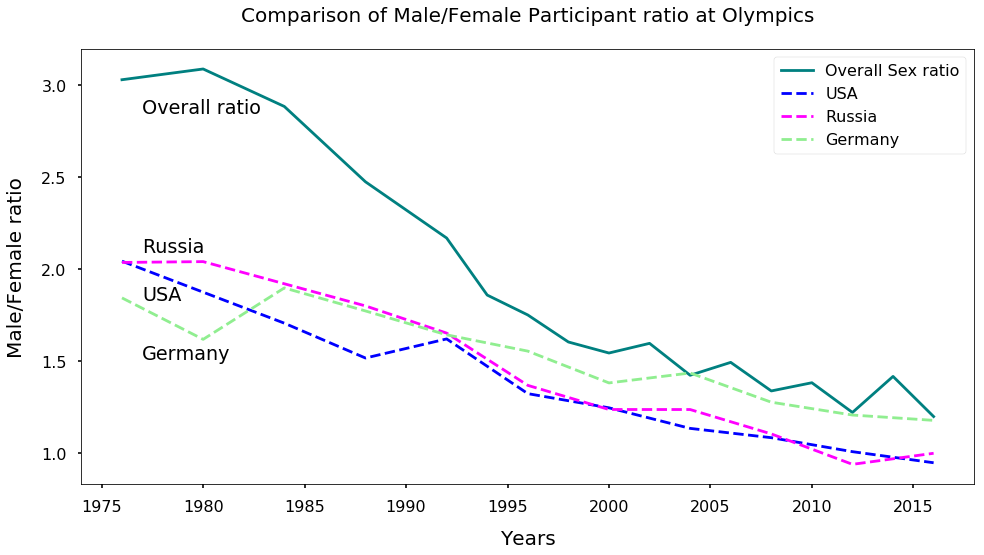

In [13]:
sns.set_context("poster")
plt.rcParams['figure.figsize']=(16,8)
plt.plot(df_sex_ratio.Year, df_sex_ratio.ratio, label="Overall Sex ratio", color="teal")
plt.plot(df_sex_ratio_USA.Year, df_sex_ratio_USA.ratio, label="USA", color="blue",  linestyle='--')
plt.plot(df_sex_ratio_RUS.Year, df_sex_ratio_RUS.ratio, label="Russia", color="magenta",  linestyle='--')
plt.plot(df_sex_ratio_GER.Year, df_sex_ratio_GER.ratio, label="Germany", color="lightgreen",  linestyle='--')
plt.title("Comparison of Male/Female Participant ratio at Olympics", y=1.05, fontsize=20)
plt.annotate('USA', xy=(1985, 1.6), xytext=(1977, 1.83),)  
plt.annotate('Russia', xy=(1990, 1.78), xytext=(1977, 2.09),) 
plt.annotate('Overall ratio', xy=(1990, 1.78), xytext=(1977, 2.85),) 
plt.annotate('Germany', xy=(1990, 1.78), xytext=(1977, 1.51),)            
plt.xlabel("Years", labelpad=15, fontsize=20)
plt.ylabel("Male/Female ratio", labelpad=15, fontsize=20)
plt.legend(loc='upper right', fontsize='small')
plt.show()

<a id="i4"></a>

## Insights

1. USA, Russia and Germany are three of the top countries who perform well at both Summer and Winter Olympics. Comparing their sex ratios to the overall sex ratio at the Olympic games, we can see that their sex ratios are comparitively lower than the overall value.
     * This is interesting because one of the reasons why they do well at the games could be because they train their athletes without any discrimination on gender and give oppurtunity to people with talents.

<a id="ed"></a>

# Exploratory Data Analysis

<a id="e1"></a>

##  Female dominated Sports

In [14]:
df_popular_sex_summer=df_olympics_summer.groupby(["Sport", "Sex"]).ID.count().to_frame().reset_index()
df_popular_sex_summer=pd.pivot_table(index="Sport", values="ID", columns="Sex", data=df_popular_sex_summer)
df_popular_sex_summer["total"]=df_popular_sex_summer.apply(lambda x: x.F+x.M, axis=1)
df_popular_sex_summer=df_popular_sex_summer.reset_index()
df_popular_sex_summer.fillna(0, inplace=True)
df_popular_sex_summer=df_popular_sex_summer[(df_popular_sex_summer.F>=df_popular_sex_summer.M) & (df_popular_sex_summer.M!=0)]
df_popular_sex_summer=df_popular_sex_summer.sort_values(["total", "F"], ascending=True)
df_popular_sex_summer

Sex,Sport,F,M,total
13,Golf,60.0,60.0,120.0
30,Trampolining,76.0,76.0,152.0
2,Badminton,740.0,717.0,1457.0


In [17]:
trace1 = go.Bar(
    x=df_popular_sex_summer.Sport,
    y=df_popular_sex_summer.F,
    name='Female', orientation = 'v',
    marker=dict(color='#d02090'),
    hoverinfo='none'
)
trace2 = go.Bar(
    x=df_popular_sex_summer.Sport,
    y=df_popular_sex_summer.M,
    name='Male', orientation = 'v',
    marker=dict(color='#4169e1'),
    hoverinfo='none'
)
data = [trace1, trace2]
layout=go.Layout(barmode='stack',
                 title="Female Dominated Sports",
                 font=dict(size=18),
                 xaxis={'title':'Sports',
                    'tickfont':dict(size=14),
                       'tickangle':0}, 
                 yaxis={'title':'Count of participants',
                       'tickfont':dict(size=14)},
                 legend=dict(orientation="v"),
                 showlegend=True)
annotations=[]
for index, row in df_popular_sex_summer.iterrows():
    temp=df_popular_sex_summer.loc[index]
    if temp.Sport=="Badminton":
        col="#00FA9A"
    else:
        col="#32CD32"
    annotations.append(dict(x=temp.Sport, y=(temp.F)+200, text=("Female="+str(int(temp.F))+"\n"+"Male="+str(int(temp.M))),
                                font=dict(family='Arial', size=14,
                                color=col),
                                showarrow=False,))    
    layout['annotations']=annotations
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

1. In a broader sense, Olympics is male dominated , but there are some sports where females still outshine men.    
    * Badminton->Back in the mid-19th century when badminton was invented, it was considered a feminine sport as its rules were pretty lax and the sport was not a physical one then. But, now that perception has changed as game became more tougher and faster, the women still remains but, number of men participating have incresed considerably.   
    * Golf is in the top of the list because after 1904 golf was reinstated to Olympics for the first time in Rio 2016 games, where we had our sex ratio closer to one. Hence, when considering last 10 years of Summer Olympics Golf appears in the female dominated sports list.
    * Events like Synchronized Swimming and Rhythmic Gymnastics are only meant for females. This could be attributed to the fact that women are more flexible physically than men and hence has an upper-hand in executing these sports with highest perfection.
    * Softball also appears in the list beacuse its women's baseball with slighter alterations to the size of the field and ball used.

<a id="e2"></a>

##  Age analysis

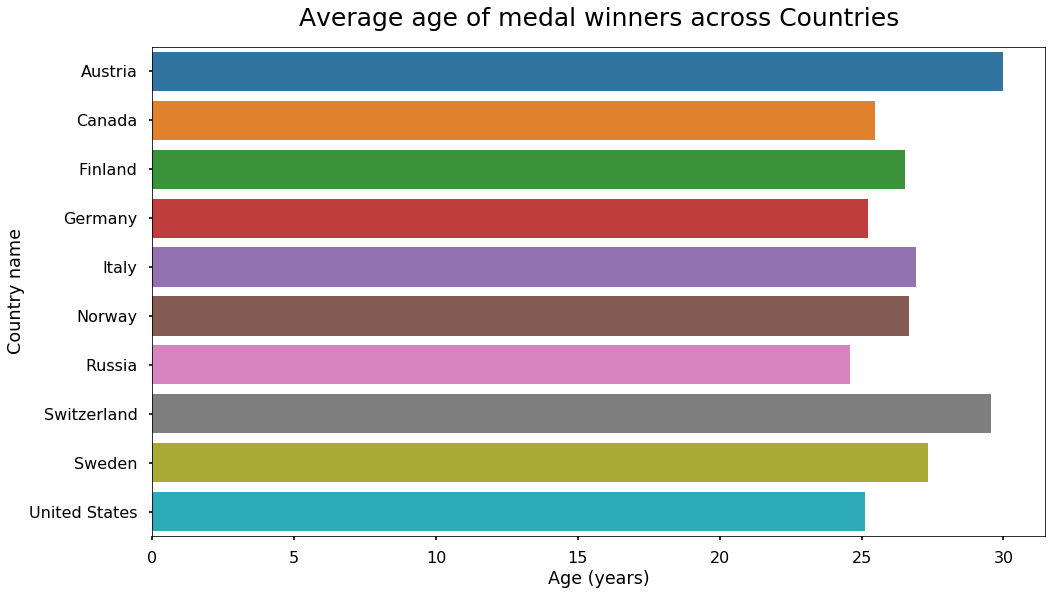

In [33]:
df_olympics_medal_demo=df_olympics_medal_summer.groupby(["NOC"]).agg(\
    {"Height":"mean", "Weight":"mean", "Age":"mean"}).reset_index()
df_body_mean=df_olympics_medal_demo[df_olympics_medal_demo.NOC.isin(top_countries)]
df_body_mean_country_name=pd.merge(df_body_mean, df_country_names, how="left", left_on="NOC", right_on="Code")
plt.figure(figsize=(16,9))
sns.barplot(x="Age", y="Country", data=df_body_mean_country_name)
plt.title("Average age of medal winners across Countries", fontsize=25, y=1.03)
plt.ylabel("Country name")
plt.xlabel("Age (years)")
plt.show()

**The age of participants are almost same across countries over the years.**

<a id="e3"></a>

## Sex ratio at Summer vs Winter Olympics

In [23]:
# Winter
df_sex_ratio_winter=df_olympics_winter.groupby(["Year", "Sex"]).ID.count().to_frame().reset_index()
df_sex_ratio_winter=pd.pivot_table(index="Year", values="ID", columns="Sex", data=df_sex_ratio_winter)
df_sex_ratio_winter.fillna(1, inplace=True)
df_sex_ratio_winter["ratio"]=df_sex_ratio_winter.apply(lambda x: x.M/x.F, axis=1)
df_sex_ratio_winter=df_sex_ratio_winter.reset_index()
# Summer
df_sex_ratio_summer=df_olympics_summer.groupby(["Year", "Sex"]).ID.count().reset_index()
df_sex_ratio_summer=pd.pivot_table(df_sex_ratio_summer, values='ID', index=['Year'],\
                                        columns=['Sex']).reset_index()
df_sex_ratio_summer.fillna(1, inplace=True)
df_sex_ratio_summer["ratio"]=df_sex_ratio_summer.apply(lambda x: x.M/x.F, axis=1)

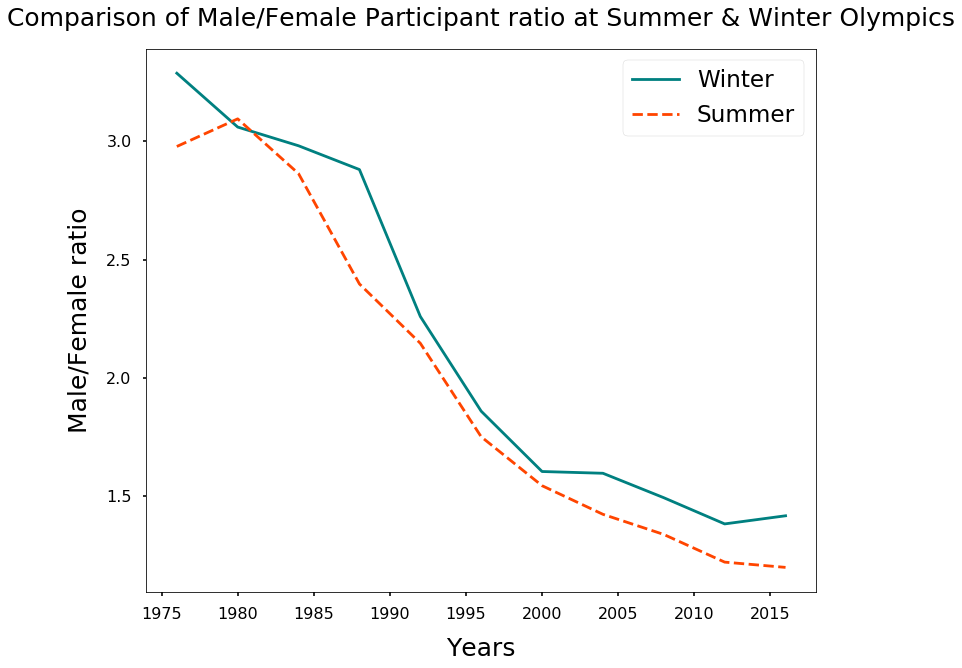

In [27]:
plt.rcParams['figure.figsize']=(12,10)
plt.plot(df_sex_ratio_summer.Year, df_sex_ratio_winter.ratio, label="Winter", color="#008080")
plt.plot(df_sex_ratio_summer.Year, df_sex_ratio_summer.ratio, linestyle='--', label="Summer", color="#ff4500")
plt.title("Comparison of Male/Female Participant ratio at Summer & Winter Olympics", y=1.03, fontsize=25)
plt.xlabel("Years", labelpad=15, fontsize=25)
plt.ylabel("Male/Female ratio", labelpad=15, fontsize=25)
plt.legend(loc='upper right', fontsize='large')
plt.show()

**In both Summer and Winter games sex ratio has decreased over the years which shows a positive growth in the society around the world.**